<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Task-1" data-toc-modified-id="Task-1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Task 1</a></span></li><li><span><a href="#Task-2" data-toc-modified-id="Task-2-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Task 2</a></span><ul class="toc-item"><li><span><a href="#Task-2-a)" data-toc-modified-id="Task-2-a)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Task 2 a)</a></span></li><li><span><a href="#Task-2-b)" data-toc-modified-id="Task-2-b)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Task 2 b)</a></span></li><li><span><a href="#Task-2-c)" data-toc-modified-id="Task-2-c)-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Task 2 c)</a></span></li></ul></li><li><span><a href="#Task-3" data-toc-modified-id="Task-3-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Task 3</a></span><ul class="toc-item"><li><span><a href="#Task-3-a)" data-toc-modified-id="Task-3-a)-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Task 3 a)</a></span></li><li><span><a href="#Task-3-b)" data-toc-modified-id="Task-3-b)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Task 3 b)</a></span></li><li><span><a href="#Task-3-c)" data-toc-modified-id="Task-3-c)-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Task 3 c)</a></span></li><li><span><a href="#Task-3-d)" data-toc-modified-id="Task-3-d)-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Task 3 d)</a></span></li></ul></li><li><span><a href="#Task-4" data-toc-modified-id="Task-4-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Task 4</a></span><ul class="toc-item"><li><span><a href="#Task-4-a)" data-toc-modified-id="Task-4-a)-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Task 4 a)</a></span></li><li><span><a href="#Task-4-b)" data-toc-modified-id="Task-4-b)-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Task 4 b)</a></span></li></ul></li><li><span><a href="#Task-5" data-toc-modified-id="Task-5-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Task 5</a></span><ul class="toc-item"><li><span><a href="#Task-5-a)" data-toc-modified-id="Task-5-a)-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Task 5 a)</a></span></li><li><span><a href="#Task-5-b)" data-toc-modified-id="Task-5-b)-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Task 5 b)</a></span></li></ul></li></ul></div>

In [113]:
# setup autoload for imported python modules
%load_ext autoreload
%autoreload 2

# import modules form utils.py
from utils import *

# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering

from sklearn.neighbors import kneighbors_graph

from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import normalized_mutual_info_score


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Task 1

In [114]:
# import spiral.txt dataset
# x1, x2: data features
# y: ground-truth labels

df = pd.read_csv('spiral.txt', sep="\t", header=None, names=["x1", "x2", "y"])
print("data shape: ", df.shape)
df.head()

data shape:  (312, 3)


,x1,x2,y
0,31.95,7.95,3
1,31.15,7.30,3
2,30.45,6.65,3
3,29.70,6.00,3
4,28.90,5.55,3


In [115]:
# convert the dataframe to numpy array for calculations with libraries like scikit-learn
data = df[["x1","x2"]].values
print("data shape: ", data.shape)

data_array = df.to_numpy()

ground_truth_labels = df["y"].values
print("label shape: ", ground_truth_labels.shape)

data shape:  (312, 2)
label shape:  (312,)


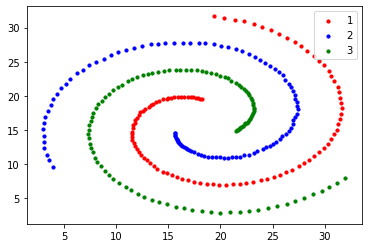

In [116]:
# plot the dataset
scatter_x1 = df["x1"].values
scatter_x2 = df["x2"].values
group = df["y"].values
cdict = {1: 'red', 2: 'blue', 3: 'green'}

fig, ax = plt.subplots()
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x1[ix], scatter_x2[ix], c = cdict[g], label = g, s = 10)
ax.legend()
plt.show()

In [117]:
# pre-processing
# - no imputation or pruning needed since no missing data

# standardization
scaler = StandardScaler() # standardization
data_scaled = scaler.fit_transform(data)

In [118]:
# k-means clustering

k = 3 # number of clusters

kmeans = KMeans(init="random", n_clusters=k, n_init=10, random_state=42)
kmeans.fit(data_scaled)
labels_kmeans = kmeans.labels_

# calculate evaluation indices
score_silhouette = silhouette_score(data_scaled, kmeans.labels_)
score_davies = davies_bouldin_score(data_scaled, kmeans.labels_)
score_nmi = normalized_mutual_info_score(ground_truth_labels, kmeans.labels_)

print("score_silhouette: ", score_silhouette)
print("score_davies: ", score_davies)
print("score_nmi: ", score_nmi)

score_silhouette:  0.36162860980249323
score_davies:  0.8734774442708373
score_nmi:  0.000597913234998712


/Users/brenoaberle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


k-means clustering


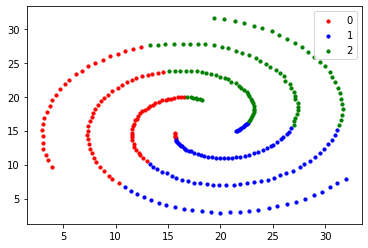

In [119]:
# plot the dataset
print("k-means clustering")

scatter_x1 = data[:,0]
scatter_x2 = data[:,1]
group = labels_kmeans
cdict = {0: 'red', 1: 'blue', 2: 'green'}

fig, ax = plt.subplots()
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x1[ix], scatter_x2[ix], c = cdict[g], label = g, s = 10)
ax.legend()
plt.show()

In [120]:
# spectral clustering
# - Gaussian RBF kernel
spectral_clustering = SpectralClustering(n_clusters=k, affinity='rbf', gamma=2, assign_labels="discretize", random_state=0)
spectral_clustering.fit(data)
labels_spectral = spectral_clustering.labels_

# calculate evaluation indices
score_silhouette = silhouette_score(data_scaled, labels_spectral)
score_davies = davies_bouldin_score(data_scaled, labels_spectral)
score_nmi = normalized_mutual_info_score(ground_truth_labels, labels_spectral)

print("score_silhouette: ", score_silhouette)
print("score_davies: ", score_davies)
print("score_nmi: ", score_nmi)

score_silhouette:  0.001393007226841032
score_davies:  5.819660572385967
score_nmi:  1.0


/Users/brenoaberle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


k-means clustering


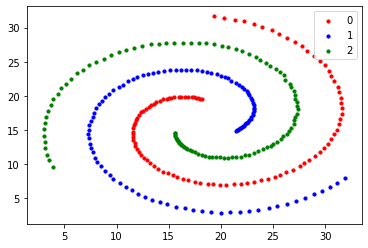

In [121]:
# plot the dataset
print("k-means clustering")

scatter_x1 = data[:,0]
scatter_x2 = data[:,1]
group = labels_spectral
cdict = {0: 'red', 1: 'blue', 2: 'green'}

fig, ax = plt.subplots()
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x1[ix], scatter_x2[ix], c = cdict[g], label = g, s = 10)
ax.legend()
plt.show()

<div class="alert alert-success">
<b>Questions</b> 

Try to figure out which Laplacian matrix is used:
* The spectral clustering algorithm of the scikitlearn library uses projection of the normalized Laplacian matrix.

Rank the algorithms in terms of their performance with respect to each of the indices and discuss the results:
* Silhouette: The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. 

* Davis Boulding: Davies-Bouldin index is the ratio between the within cluster distances and the between cluster distances and computing the average overall the clusters. Ranging from 0 to 1, lower score is better.

* Normalized Mutual Information (NMI) is a normalization of the Mutual Information (MI) score to scale the results between 0 (no mutual information) and 1 (perfect correlation).

* Based on the printed scores we can see. That k-means has a better Silhouette and Davis-Boulding index score. However, Spectral clustering has a much better NMI score.

Which one captures the performance of the algorithm more accurately?
* Only by looking at the plots after the clustering it is obviously that Spectral clustering performs way better than k-means for the given data set. K-means works with a euclidean distance matrix and is therefore not able to cluster into that spiral shape. In the plot for the kmeans algorithm you can see that the data is divided into sectors. However, spectral clustering perfectly clusters the dataset which is also reflected in the NMI score of 1.

* NMI captures the performance the given dataset much better. Since Spectral Clustering is able to perfectly cluster the dataset. But the scores for Silhouette and Davis are better for k-means. Therefore NMI is in this context better to measure the performance.

</div>

## Task 2

### Task 2 a)

In [122]:
# Calculate RBF kernel matrix
kernel_matrix = rbf_kernel(data)
kernel_matrix

array([[1.00000000e+00, 5.87869673e-01, 1.39456856e-01, ...,
        4.87052255e-67, 9.77214824e-68, 5.05074786e-68],
       [5.87869673e-01, 1.00000000e+00, 6.33655403e-01, ...,
        2.19594144e-63, 3.74509113e-64, 1.81383965e-64],
       [1.39456856e-01, 6.33655403e-01, 1.00000000e+00, ...,
        7.82787180e-61, 1.13478213e-61, 5.15014961e-62],
       ...,
       [4.87052255e-67, 2.19594144e-63, 7.82787180e-61, ...,
        1.00000000e+00, 9.69233234e-01, 9.40588063e-01],
       [9.77214824e-68, 3.74509113e-64, 1.13478213e-61, ...,
        9.69233234e-01, 1.00000000e+00, 9.95012479e-01],
       [5.05074786e-68, 1.81383965e-64, 5.15014961e-62, ...,
        9.40588063e-01, 9.95012479e-01, 1.00000000e+00]])

In [123]:
# calculate the scores of tau
score_kmeans = validation_method(kernel_matrix, labels_kmeans)
print("Tau score_kmeans", score_kmeans)

score_spectral = validation_method(kernel_matrix, labels_spectral)
print("Tau score_spectral", score_spectral)

Tau score_kmeans 0.930070628436259
Tau score_spectral 0.9994790295553357


<div class="alert alert-success">
<b>Questions</b> 

compare the results with the ones indicated by Silhouette and Davies- Bouldin:
* How I see it, it is more in alignment with the NMI score.
* For kmeans it is approximately the half of spectral. The same case as with NMI.

Discuss the results. Is this index a better choice in this case?
* Yes it is a better choice than Silhouette and Davies. For the given datasets with the spirals Silhouette and Davies are not suitable scores which was shown in task 1. 
* If we only look at the order of the calculated tau scores we can see that spectral clustering has a better score than kmeans. This already shows that tau-score is better than Silhouette and Davies. So the order is more like in the case of NMI.
* However, the scores are very close to each other. So we don't really know how much better spectral clustering is in comparison to kmeans for the given dataset. That's definitely one drawback.

</div>

### Task 2 b)

<div class="alert alert-success">
<b>Questions</b> 

Do you see any clear disadvantage in using τ? Hint: consider the definition of the Gaussian kernel.
* One major disadvantage or constraint to the used performance measures from exercise 1 is that we need to set sigma manually. So we have one more tuning parameter.
* Since we are using a kernel we lose some information. The kernel maps the data to a higher-dimensional space to be better separable. However, by this transformation we lose information by working with approximations. But this is also the case for other measurements that are working with approximations.

</div>



### Task 2 c)

In [124]:
# nearest neighbor matrix
knn_matrix = kneighbors_graph(data, 2, mode='connectivity', include_self=True) # number of nearest neighbors 
knn_matrix = knn_matrix.toarray()
knn_matrix

array([[1., 1., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 1., 1.]])

In [125]:
tau_kmeans_knn = validation_method(knn_matrix, labels_kmeans)
print("tau_kmeans_knn", tau_kmeans_knn)

tau_spectral_knn = validation_method(knn_matrix, labels_spectral)
print("tau_kmeans_knn", tau_kmeans_knn)

tau_kmeans_knn 0.9775641025641025
tau_kmeans_knn 0.9775641025641025


<div class="alert alert-success">
<b>Questions</b> 

Propose an alternative validation index. Discuss the motivation, and possible disadvantages. 
* Based on the hint I was thinking of taking the k-nearest-neighbor graph as similarity matrix. That's intutitive because it is probably one of the simplest ways to measure similarity. The matrix consists of binary values 0 or 1. One advantage is that it is computationally easy. By using Euclidean distance it is easy to measure/calculate. 

Try it and discuss the results. 
* However, the results are not good. Even after tuning the parameter 'number of neighbors' the results don't get better. Both kmeans as well as spectral clustering have the same score. Therefore this similarity measure is not suitable in that context. It doesn't contain enough information.

Hint: try to combine the idea of τ with other similarity matrices, such as the k-nearest-neighbour graph adjacency matrix, etc.

</div>

## Task 3

In [126]:
# create pandas dataframe
data = {'num_rule': np.arange(1,13), 
        'fr(x)': [300, 500, 500, 342, 2, 500, 260, 120, 240, 80, 200, 251],
        'fr(xc)': [125, 150, 400, 240, 2, 352, 100, 32, 100, 32, 100, 203]
       }
df = pd.DataFrame(data=data)

n = 1000

# fr((not)x)
fr_not_x = 1000 - df['fr(x)'].values
df.insert(2, 'fr((not)x)', fr_not_x, True)

# P(x)
prob_x = df['fr(x)'].values / 1000
df['P(x)'] = prob_x

# P((not)x)
prob_not_x = df['fr((not)x)'].values / 1000
df['P((not)x)'] = prob_not_x

# P(xc)
prob_xc = df['fr(xc)'].values / 1000
df['P(xc)'] = prob_xc

# P(c)
prob_conseq = [0.3, 0.3, 0.7, 0.7, 0.7, 0.7, 0.3, 0.3, 0.3, 0.3, 0.3, 0.7]
df['P(c)'] = prob_conseq

# P((not)c)
prob_not_c = 1 - df['P(c)'].values
df['P((not)c)'] = prob_not_c

# leverage
leverage = df['P(xc)'].values - df['P(x)'].values * df['P(c)'].values
df['leverage'] = leverage

# lift
gamma = df['P(xc)'].values / ( df['P(x)'].values * df['P(c)'].values )
df['gamma'] = gamma



# Task b) 

# P(x(not)c)
prob_x_not_c = (df['fr(x)'].values - df['fr(xc)'].values) / 1000
df['P(x(not)c)'] = prob_x_not_c

# fr((not)xc)
fr_not_x_c = df['fr((not)x)'].values * df['P(c)'].values - n * df['leverage'].values
df['fr((not)xc)'] = fr_not_x_c

# P((not)xc)
prob_not_x_c = ( df['fr((not)xc)'].values ) / 1000
df['P((not)xc)'] = prob_not_x_c
 
# fr((not)x(not)c)
fr_not_x_not_c = df['fr((not)x)'].values - df['fr((not)xc)'].values
df['fr((not)x(not)c)'] = fr_not_x_not_c

# P((not)x(not)c)
prob_not_x_not_c = ( df['fr((not)x(not)c)'].values ) / 1000
df['P((not)x(not)c)'] = prob_not_x_not_c

# Calculate MI
mi = ( df['P(xc)']**df['P(xc)'] * df['P(x(not)c)']**df['P(x(not)c)'] * df['P((not)xc)']**df['P((not)xc)'] * df['P((not)x(not)c)']**df['P((not)x(not)c)'] ) / ( df['P(x)']**df['P(x)'] * df['P((not)x)']**df['P((not)x)'] * df['P(c)']**df['P(c)'] * df['P((not)c)']**df['P((not)c)'] )  #
mi = np.log2(mi)
df['MI'] = mi

# Calculate n*MI
df['n*MI'] = df['MI'].values * n

df


,num_rule,fr(x),fr((not)x),fr(xc),P(x),P((not)x),P(xc),P(c),P((not)c),leverage,gamma,P(x(not)c),fr((not)xc),P((not)xc),fr((not)x(not)c),P((not)x(not)c),MI,n*MI
0,1,300,700,125,0.300,0.700,0.125,0.3,0.7,0.0350,1.388889,0.175,175.0,0.175,525.0,0.525,0.019436,19.435585
1,2,500,500,150,0.500,0.500,0.150,0.3,0.7,0.0000,1.000000,0.350,150.0,0.150,350.0,0.350,0.000000,0.000000
2,3,500,500,400,0.500,0.500,0.400,0.7,0.3,0.0500,1.142857,0.100,300.0,0.300,200.0,0.200,0.034852,34.851555
3,4,342,658,240,0.342,0.658,0.240,0.7,0.3,0.0006,1.002506,0.102,460.0,0.460,198.0,0.198,0.000005,0.005498
4,5,2,998,2,0.002,0.998,0.002,0.7,0.3,0.0006,1.428571,0.000,698.0,0.698,300.0,0.300,0.001030,1.030385
5,6,500,500,352,0.500,0.500,0.352,0.7,0.3,0.0020,1.005714,0.148,348.0,0.348,152.0,0.152,0.000055,0.054961
6,7,260,740,100,0.260,0.740,0.100,0.3,0.7,0.0220,1.282051,0.160,200.0,0.200,540.0,0.540,0.008399,8.398762
7,8,120,880,32,0.120,0.880,0.032,0.3,0.7,-0.0040,0.888889,0.088,268.0,0.268,612.0,0.612,0.000531,0.530725
8,9,240,760,100,0.240,0.760,0.100,0.3,0.7,0.0280,1.388889,0.140,200.0,0.200,560.0,0.560,0.014202,14.201863
9,10,80,920,32,0.080,0.920,0.032,0.3,0.7,0.0080,1.333333,0.048,268.0,0.268,652.0,0.652,0.002847,2.846664


### Task 3 a)

In [127]:
# Prune out rules that do not express positive statistical dependence.
df = df[df['leverage'] > 0]
df = df[df['gamma'] > 1]
df

,num_rule,fr(x),fr((not)x),fr(xc),P(x),P((not)x),P(xc),P(c),P((not)c),leverage,gamma,P(x(not)c),fr((not)xc),P((not)xc),fr((not)x(not)c),P((not)x(not)c),MI,n*MI
0,1,300,700,125,0.300,0.700,0.125,0.3,0.7,0.0350,1.388889,0.175,175.0,0.175,525.0,0.525,0.019436,19.435585
2,3,500,500,400,0.500,0.500,0.400,0.7,0.3,0.0500,1.142857,0.100,300.0,0.300,200.0,0.200,0.034852,34.851555
3,4,342,658,240,0.342,0.658,0.240,0.7,0.3,0.0006,1.002506,0.102,460.0,0.460,198.0,0.198,0.000005,0.005498
4,5,2,998,2,0.002,0.998,0.002,0.7,0.3,0.0006,1.428571,0.000,698.0,0.698,300.0,0.300,0.001030,1.030385
5,6,500,500,352,0.500,0.500,0.352,0.7,0.3,0.0020,1.005714,0.148,348.0,0.348,152.0,0.152,0.000055,0.054961
6,7,260,740,100,0.260,0.740,0.100,0.3,0.7,0.0220,1.282051,0.160,200.0,0.200,540.0,0.540,0.008399,8.398762
8,9,240,760,100,0.240,0.760,0.100,0.3,0.7,0.0280,1.388889,0.140,200.0,0.200,560.0,0.560,0.014202,14.201863
9,10,80,920,32,0.080,0.920,0.032,0.3,0.7,0.0080,1.333333,0.048,268.0,0.268,652.0,0.652,0.002847,2.846664
10,11,200,800,100,0.200,0.800,0.100,0.3,0.7,0.0400,1.666667,0.100,200.0,0.200,600.0,0.600,0.032268,32.268400
11,12,251,749,203,0.251,0.749,0.203,0.7,0.3,0.0273,1.155378,0.048,497.0,0.497,252.0,0.252,0.014462,14.461504


<div class="alert alert-success">
<b>Questions</b> 

* Rules 2 and 8 get pruned out

</div>



### Task 3 b)

In [128]:
# prune out rules where n · MI < 1.5 (i.e., MI < 0.0015).

df = df[df['n*MI'] >= 1.5]
df

,num_rule,fr(x),fr((not)x),fr(xc),P(x),P((not)x),P(xc),P(c),P((not)c),leverage,gamma,P(x(not)c),fr((not)xc),P((not)xc),fr((not)x(not)c),P((not)x(not)c),MI,n*MI
0,1,300,700,125,0.300,0.700,0.125,0.3,0.7,0.0350,1.388889,0.175,175.0,0.175,525.0,0.525,0.019436,19.435585
2,3,500,500,400,0.500,0.500,0.400,0.7,0.3,0.0500,1.142857,0.100,300.0,0.300,200.0,0.200,0.034852,34.851555
6,7,260,740,100,0.260,0.740,0.100,0.3,0.7,0.0220,1.282051,0.160,200.0,0.200,540.0,0.540,0.008399,8.398762
8,9,240,760,100,0.240,0.760,0.100,0.3,0.7,0.0280,1.388889,0.140,200.0,0.200,560.0,0.560,0.014202,14.201863
9,10,80,920,32,0.080,0.920,0.032,0.3,0.7,0.0080,1.333333,0.048,268.0,0.268,652.0,0.652,0.002847,2.846664
10,11,200,800,100,0.200,0.800,0.100,0.3,0.7,0.0400,1.666667,0.100,200.0,0.200,600.0,0.600,0.032268,32.268400
11,12,251,749,203,0.251,0.749,0.203,0.7,0.3,0.0273,1.155378,0.048,497.0,0.497,252.0,0.252,0.014462,14.461504


<div class="alert alert-success">
<b>Questions</b> 

* Rules 4,5, and 6 get pruned out

</div>

### Task 3 c)

### Task 3 d)

## Task 4

### Task 4 a)

### Task 4 b)

## Task 5

### Task 5 a)

### Task 5 b)